Last edit: June 21st, 2018

# Calculation of Mott shell structure

<div style="text-align: right;">
<font size="4">Editor: Ryuta Yamamoto</font>
</div>

Reference.)

[1] [C. Weitenberg, "Single-Atom Resolved Imaging and Manipulation in an Atomic Mott Insulator
" pp.41~54, PhD thesis (2011)](https://edoc.ub.uni-muenchen.de/13425/)

## Load python modules

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Mathmatics calculation
from sympy import pi
from sympy import Symbol, symbols
from sympy import sqrt, sin, cos
from sympy import Matrix, transpose
from sympy import solve, simplify
from sympy.plotting import plot, plot3d
from sympy import init_printing

init_printing()

### Default plot settings
see: https://matplotlib.org/users/customizing.html

In [2]:
plt.rcParams["font.size"] = 14
plt.rcParams['xtick.direction'] = 'in' # direction: in, out, or inout
plt.rcParams['ytick.direction'] = 'in' # direction: in, out, or inout
plt.rcParams['axes.linewidth'] = 1.5 # edge linewidth
plt.rcParams['xtick.major.size'] = 8 # major tick size in points
plt.rcParams['xtick.major.width'] = 1.5 # major tick width in points
plt.rcParams['xtick.top'] = True # draw ticks on the top side
plt.rcParams['ytick.major.size'] = 8 # major tick size in points
plt.rcParams['ytick.major.width'] = 1.5 # major tick width in points
plt.rcParams['ytick.right'] = True # draw ticks on the right side

### [Fundamental physical constants (2006 CODATA)](https://physics.nist.gov/cuu/Constants/RevModPhys_80_000633acc.pdf)

In [3]:
c_val = 2.99792458 * 1e8 # Speed of Light (m/s)
mu_0_val = 2 * np.pi * 1e-7 # Permeability of Vacuum (N/A^2)
epsilon_0_val = 1 / (mu_0_val * c_val**2) # Permittivity of Vacuum (F/m)
h_val = 6.62606896 * 1e-34 # Planck constant (J/Hz)
hbar_val = 6.62606896 * 1e-34 / (2 * np.pi) # Dirac constant (J/Hz)
e_val = 1.602176487 * 1e-19 # Elementary Charge (C)
mu_B_val = 9.27400915 * 1e-24 # Bohr Magneton (J/G)
mass_u_val = 1.660538782 * 1e-27 # Atomic Mass Unit (kg)
mass_e_val = 9.10938215 * 1e-31 # Electron Mass (kg)
a0_val = 0.52917720859 * 1e-10 # Bohr Radius (m)
kB_val = 1.3806504 * 1e-23 # Boltzmann constant (J/K)

### Functions
Norm_vector(v): $\left|\boldsymbol{v} \right|^2$

Cross_vector(v1, v2): $\boldsymbol{v}_1 \times \boldsymbol{v}_2$

In [4]:
def Norm_vector(v):
    return sqrt((transpose(v) * v)[0])

def Cross_vector(v1, v2):
    return Matrix([v1[1]*v2[2]-v1[2]*v2[1], v1[2]*v2[0]-v1[0]*v2[2], v1[0]*v2[1]-v1[1]*v2[0]])

### Symbols for sympy calculation

In [5]:
x, y, z = symbols('x y z', real=True)

# Cartesian coordinates
r = Matrix([x, y, z])

# Wavenumber of horizontal and vertical lattice beam
k = Symbol("k", positive=True)


---
## (Standard) square lattice

Reciprocal lattice vectors $\boldsymbol{b}_i$ are defined by
$\boldsymbol{b}^1 = 2k \hat{e}_x$,
$\boldsymbol{b}^2 = 2k \hat{e}_y$,
and $\boldsymbol{b}^3 = 2k \hat{e}_z$.

Here $k = 2\pi / \lambda$ indicates wavenumber.

Using these reciprocal lattice vectors, lattice vectors can be calculated as
$\boldsymbol{a}^1 = \pi/k \hat{e}_x$,
$\boldsymbol{a}^2 = \pi/k \hat{e}_y$,
and $\boldsymbol{a}^3 = \pi/k \hat{e}_z$.


In [6]:
ks = transpose(k * Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]]))

# Reciprocal lattice vector
b1 = 2*k * Matrix([[1, 0, 0]])
b2 = 2*k * Matrix([[0, 1, 0]])

a = [0, 0, 0, 0]

a = symbols('a_x^1 a_y^1 a_x^2 a_y^2', real=True)
az = Symbol('a_z', real=True)
a1 = Matrix([a[i] if i<2 else 0 for i in range(3)])
a2 = Matrix([a[i+2] if i<2 else 0 for i in range(3)])
a3 = Matrix([0, 0, az])

eq1 = (b1 * a1)[0] - 2 * pi
eq2 = (b2 * a1)[0]
eq3 = (b1 * a2)[0]
eq4 = (b2 * a2)[0] - 2 * pi

tmp = solve([eq1, eq2, eq3, eq4], a)

b = [0, 0, 0, 0]
for n, v in enumerate(tmp.values()):
    b[n] = v

a1 = Matrix([b[i] if i<2 else 0 for i in range(3)])
a2 = Matrix([b[i+2] if i<2 else 0 for i in range(3)])

#### Sites

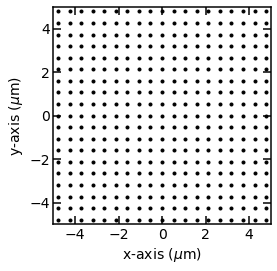

In [7]:
N = 51

nm = [[i - (N-1)/2, j - (N-1)/2] for i in range(N) for j in range(N)]
x_ol = Matrix([a1[0] * nm[i][0] + a2[0] * nm[i][1] for i in range(N*N)])
y_ol = Matrix([a1[1] * nm[i][0] + a2[1] * nm[i][1] for i in range(N*N)])

#x_ol.subs(k, 2 * pi / wavelength)
xs_tmp = np.array([v for v in x_ol.subs(k, 2 * pi/(1.064 * 1e-6))], dtype=np.float)
ys_tmp = np.array([v for v in y_ol.subs(k, 2 * pi/(1.064 * 1e-6))], dtype=np.float)
xs = xs_tmp[xs_tmp**2 + ys_tmp**2 < (20*1e-6)**2]
ys = ys_tmp[xs_tmp**2 + ys_tmp**2 < (20*1e-6)**2]

plt.plot(xs*1e6, ys*1e6, 'k.')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-5, 5]);
plt.ylim([-5, 5]);
plt.xlabel('x-axis ($\mu$m)');
plt.ylabel('y-axis ($\mu$m)');

#### Parameters
- $T$: temperature of atoms
- $\mu$: chemical potential
- $\omega_x$: external trap frequency along x-axis
- $\omega_y$: external trap frequency along y-axis
- $U$: Onsite interaction


In [8]:
mass_Rb_val = 87 * 1.66053886 * 1e-27; # kg

omega_x_val = 2 * np.pi * 72 # Hz
omega_y_val = 2 * np.pi * 83 # Hz

U_val = h_val * 960 # J
J_val = h_val * 3 # J (for reference)

Case = 1
if Case is 0:
    ## C. Weitenberg D. thesis, p43. Fig.5.1 (d)
    mu_val = 0.73 * U_val # J
    T_val = 0.090 * U_val / kB_val # K
elif Case is 1:
    ## C. Weitenberg D. thesis, p43. Fig.5.1 (e)
    mu_val = 1.17 * U_val # J
    T_val = 0.074 * U_val / kB_val # K
elif Case is 2:
    ## C. Weitenberg D. thesis, p43. Fig.5.1 (e)
    mu_val = 0.17 * U_val # J
    T_val = 0.074 * U_val / kB_val # K
else:
    ## C. Weitenberg D. thesis, p43. Fig.5.1 (e)
    mu_val = 1.17 * U_val # J
    T_val = 0.074 * U_val / kB_val # K

#### Calculation: local chemical potential

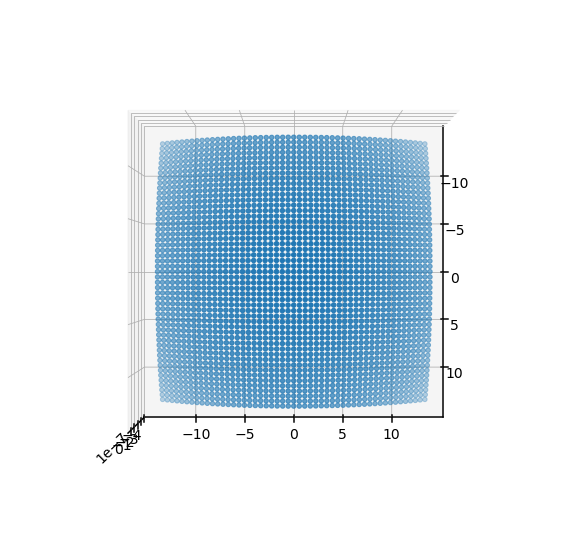

In [9]:
mu_local = mu_val - mass_Rb_val * (omega_x_val**2 * xs**2 + omega_y_val**2 * ys**2) / 2

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(xs*1e6, ys*1e6, mu_local/kB_val, cmap='jet')
ax.view_init(90, 0)

plt.show()

#### Calculation: Atom distribution

In [10]:
## Calcuration maximum occupancy
Nmax = 5;

beta_val = 1 / (kB_val * T_val)

Pr = np.zeros([mu_local.size, Nmax]) # 
Nreal = np.zeros([mu_local.size, Nmax]) # 
Ndet = np.zeros([mu_local.size, Nmax]) # 

Z = np.zeros(mu_local.shape) # Grand canonical partition function

for N in range(Nmax):
    En = N * (N - 1) * U_val / 2
    
    Pr[:, N] = np.exp((mu_local * N - En) * beta_val)
    Nreal[:, N] = N * Pr[:, N]
    Ndet[:, N] = np.mod(N, 2) * Pr[:, N]
    
    Z += Pr[:, N]

for N in range(Nmax):
    Pr[:, N] /= Z
    Nreal[:, N] /= Z
    Ndet[:, N] /= Z


Nreal = np.sum(Nreal, 1)
Ndet = np.sum(Ndet, 1)
Ndet = (Ndet - np.min(Ndet)) / (np.max(Ndet) - np.min(Ndet))

Ntotal = np.sum(Nreal);

In [11]:
Ntotal

##### Plot: atom distribution - real number

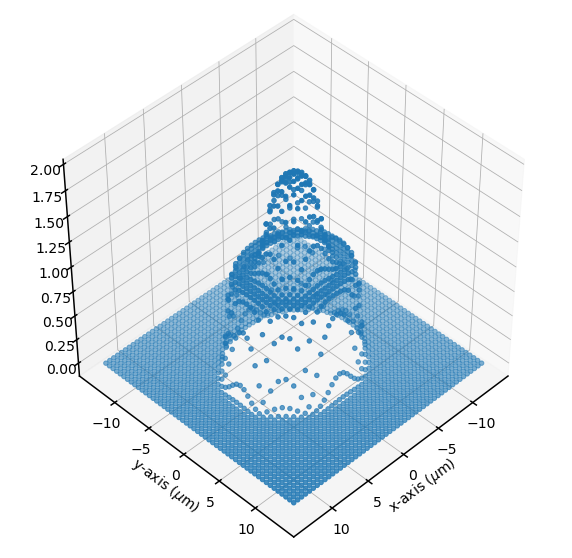

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(xs*1e6, ys*1e6, Nreal)
ax.view_init(45, 45)
plt.xlabel('x-axis ($\mu$m)');
plt.ylabel('y-axis ($\mu$m)');

plt.show()

##### Plot: atom distribution - after parity measurement

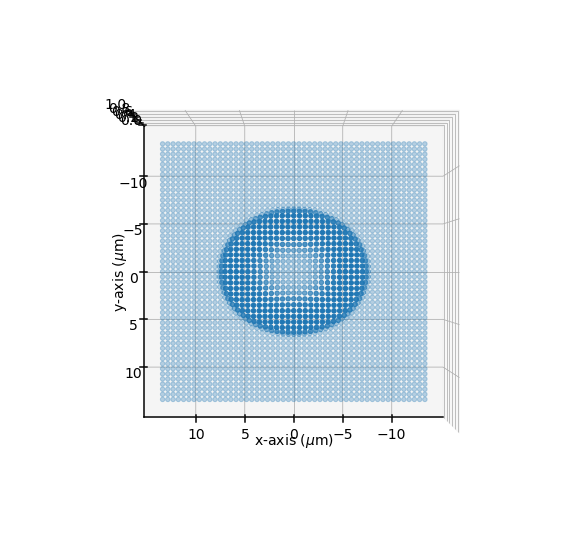

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(xs*1e6, ys*1e6, Ndet)
ax.view_init(90, 90)
plt.xlabel('x-axis ($\mu$m)');
plt.ylabel('y-axis ($\mu$m)');

plt.show()

---
### Triangular lattice
Wavenumbers of horizontal lattice $\boldsymbol{k}^i$ are defined by
\begin{eqnarray*}
\boldsymbol{k} = 
\begin{pmatrix}
\boldsymbol{k}^1 & \boldsymbol{k}^2 & \boldsymbol{k}^3 \\
\end{pmatrix}
= k \times \begin{pmatrix}
1 & \cos\theta & \cos\theta \\
0 & \sin\theta & -\sin\theta \\
0 & 0 & 0 \\
\end{pmatrix},
\end{eqnarray*}
where wavenumber $k = 2\pi / \lambda$ and $\theta$ is relative angle between lattice beams.

Reciprocal lattice vector $\boldsymbol{b}_i = \boldsymbol{k}^j - \boldsymbol{k}^i$
\begin{eqnarray}
\boldsymbol{G} = \begin{pmatrix}
\boldsymbol{b}_1 & \boldsymbol{b}_2 \\
\end{pmatrix}
= k \times \begin{pmatrix}
\cos\theta - 1 & 0 \\
\sin\theta & -2\sin\theta \\
0 & 0 \\
\end{pmatrix},
\end{eqnarray}

Reciprocal lattice vectors $\boldsymbol{b}_i$ are defined by
\begin{eqnarray}
\boldsymbol{b}_1
= 2\pi \dfrac{\boldsymbol{a}_2 \times \boldsymbol{a}_3}{\boldsymbol{a}_1 \cdot (\boldsymbol{a}_2 \times \boldsymbol{a}_3)},
\boldsymbol{b}_2
= 2\pi \dfrac{\boldsymbol{a}_3 \times \boldsymbol{a}_1}{\boldsymbol{a}_1 \cdot (\boldsymbol{a}_2 \times \boldsymbol{a}_3)},
\boldsymbol{b}_3
= 2\pi \dfrac{\boldsymbol{a}_1 \times \boldsymbol{a}_2}{\boldsymbol{a}_1 \cdot (\boldsymbol{a}_2 \times \boldsymbol{a}_3)}.
\end{eqnarray}

In addition, reciprocal lattice vectors $\boldsymbol{b}_i$ satisfy
\begin{eqnarray}
\boldsymbol{b}_i \cdot \boldsymbol{a}_j
= 2\pi \delta_{ij},
\end{eqnarray}
where $\delta_{ij}$ is the Kronecker delta symbol.

reference.)

[キッテル 固体物理学入門 第8版](https://www.amazon.co.jp/%E3%82%AD%E3%83%83%E3%83%86%E3%83%AB-%E5%9B%BA%E4%BD%93%E7%89%A9%E7%90%86%E5%AD%A6%E5%85%A5%E9%96%80-%E7%AC%AC8%E7%89%88-%E3%83%8F%E3%83%BC%E3%83%88%E3%82%AB%E3%83%90%E3%83%BC%E7%89%88-%E3%83%81%E3%83%A3%E3%83%BC%E3%83%AB%E3%82%BA/dp/4621076566)

[Ashcroft/Mermin, Solid state physics](https://www.amazon.co.jp/Solid-State-Physics-Neil-Ashcroft/dp/0030839939)

In [14]:
theta0 = Symbol(r'\theta_0', real=True)
theta = Symbol(r'\theta', real=True)
dthetas = symbols(r'\varDelta\theta_1 \varDelta\theta_2', real=True)

# Lattice wavevector: ks
ks = transpose(k * Matrix([[cos(theta0), sin(theta0), 0], [cos(theta0 + theta + dthetas[0]), sin(theta0 + theta + dthetas[0]), 0], [cos(theta0 - theta + dthetas[1]), sin(theta0 - theta + dthetas[1]), 0]]))
ks = ks.subs({theta0: pi/3, theta: 2*pi/3, dthetas[0]: 0, dthetas[1]: 0})

# Reciprocal lattice vector
G = [simplify(ks[0:3:1, n+1] - ks[0:3:1, n]) for n in range(2)]

a = [0, 0, 0, 0]

a = symbols('a_x^1 a_y^1 a_x^2 a_y^2', real=True)
az = Symbol('a_z', real=True)
a1 = Matrix([a[i] if i<2 else 0 for i in range(3)])
a2 = Matrix([a[i+2] if i<2 else 0 for i in range(3)])
a3 = Matrix([0, 0, az])

eq1 = (transpose(G[0]) * a1)[0] - 2 * pi
eq2 = (transpose(G[1]) * a1)[0]
eq3 = (transpose(G[0]) * a2)[0]
eq4 = (transpose(G[1]) * a2)[0] - 2 * pi

tmp = solve([eq1, eq2, eq3, eq4], a)

b = [0, 0, 0, 0]
for n, v in enumerate(tmp.values()):
    b[n] = v
a1 = Matrix([b[i] if i<2 else 0 for i in range(3)])
a2 = Matrix([b[i+2] if i<2 else 0 for i in range(3)])

#### Sites

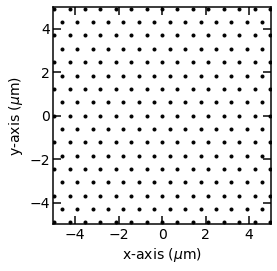

In [15]:
N = 51

nm = [[i - (N-1)/2, j - (N-1)/2] for i in range(N) for j in range(N)]
x_ol = Matrix([a1[0] * nm[i][0] + a2[0] * nm[i][1] for i in range(N*N)])
y_ol = Matrix([a1[1] * nm[i][0] + a2[1] * nm[i][1] for i in range(N*N)])

#x_ol.subs(k, 2 * pi / wavelength)
xs_tmp = np.array([v for v in x_ol.subs(k, 2 * pi/(1.064 * 1e-6))], dtype=np.float)
ys_tmp = np.array([v for v in y_ol.subs(k, 2 * pi/(1.064 * 1e-6))], dtype=np.float)
xs = xs_tmp[xs_tmp**2 + ys_tmp**2 < (15*1e-6)**2]
ys = ys_tmp[xs_tmp**2 + ys_tmp**2 < (15*1e-6)**2]

plt.plot(xs*1e6, ys*1e6, 'k.')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-5, 5]);
plt.ylim([-5, 5]);
plt.xlabel('x-axis ($\mu$m)');
plt.ylabel('y-axis ($\mu$m)');

#### Parameters
- $T$: temperature of atoms
- $\mu$: chemical potential
- $\omega_x$: external trap frequency along x-axis
- $\omega_y$: external trap frequency along y-axis
- $U$: Onsite interaction


In [47]:
mass_Rb_val = 87 * 1.66053886 * 1e-27; # kg

omega_x_val = 2 * np.pi * 100 * np.sqrt(2) # Hz
omega_y_val = 2 * np.pi * 100 * np.sqrt(2) # Hz
#omega_x_val = 2 * np.pi * 100 # Hz
#omega_y_val = 2 * np.pi * 100 # Hz

U_val = h_val * 1000 # J
U_val = h_val * 325 # J
J_val = h_val * 3 # J (for reference)

Case = 5
if Case is 0:
    mu_val = 0.73 * U_val # J
    T_val = 0.090 * U_val / kB_val # K
elif Case is 1:
    mu_val = 0.85 * U_val # J
    T_val = 0.074 * U_val / kB_val # K
elif Case is 2:
    mu_val = 2.17 * U_val # J
    T_val = 2.5 * 0.074 * U_val / kB_val # K
else:
    mu_val = 2.17 * U_val # J
    T_val = 0.074 * U_val / kB_val # K

In [48]:
T_val * 1e9

#### Calculation: local chemical potential

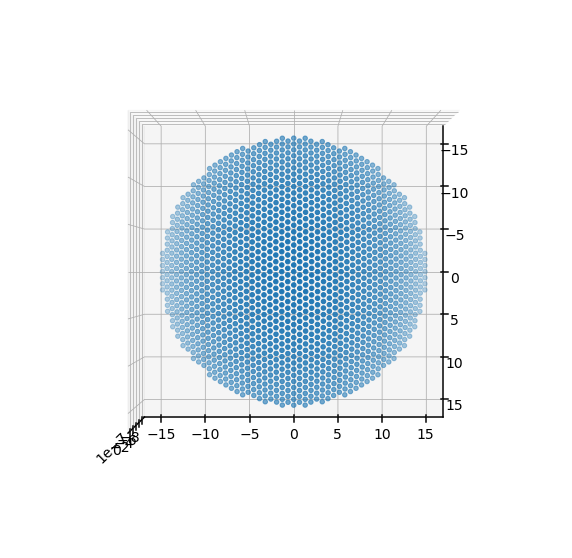

In [49]:
mu_local = mu_val - mass_Rb_val * (omega_x_val**2 * xs**2 + omega_y_val**2 * ys**2) / 2

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(xs*1e6, ys*1e6, mu_local/kB_val)
ax.view_init(90, 0)

plt.show()

#### Calculation: Atom distribution

In [50]:
## Calcuration maximum occupancy
Nmax = 5;

beta_val = 1 / (kB_val * T_val)

Pr = np.zeros([mu_local.size, Nmax]) # 
Nreal = np.zeros([mu_local.size, Nmax]) # 
Ndet = np.zeros([mu_local.size, Nmax]) # 

Z = np.zeros(mu_local.shape) # Grand canonical partition function

for N in range(Nmax):
    En = N * (N - 1) * U_val / 2
    
    Pr[:, N] = np.exp((mu_local * N - En) * beta_val)
    Nreal[:, N] = N * Pr[:, N]
    Ndet[:, N] = np.mod(N, 2) * Pr[:, N]
    
    Z += Pr[:, N]

for N in range(Nmax):
    Pr[:, N] /= Z
    Nreal[:, N] /= Z
    Ndet[:, N] /= Z


Nreal = np.sum(Nreal, 1)
Ndet = np.sum(Ndet, 1)
Ndet = (Ndet - np.min(Ndet)) / (np.max(Ndet) - np.min(Ndet))

Ntotal = np.sum(Nreal);

In [51]:
Ntotal

##### Plot: atom distribution - real number

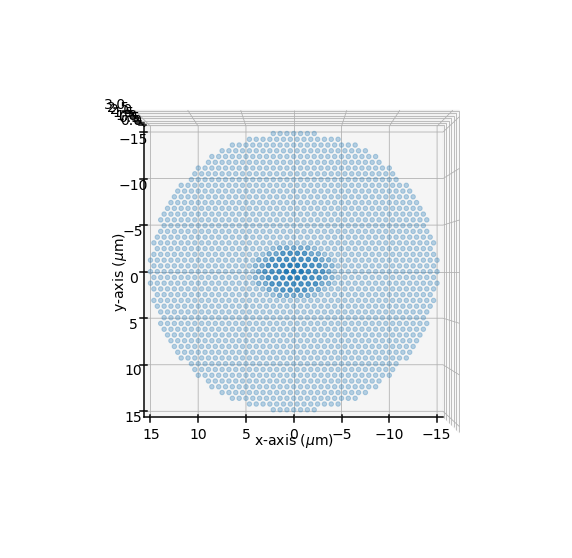

In [52]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(xs*1e6, ys*1e6, Nreal)
ax.view_init(90, 90)
plt.xlabel('x-axis ($\mu$m)');
plt.ylabel('y-axis ($\mu$m)');
plt.xlim([-15, 15])
plt.ylim([-15, 15])

plt.show()

##### Plot: atom distribution - after parity measurement

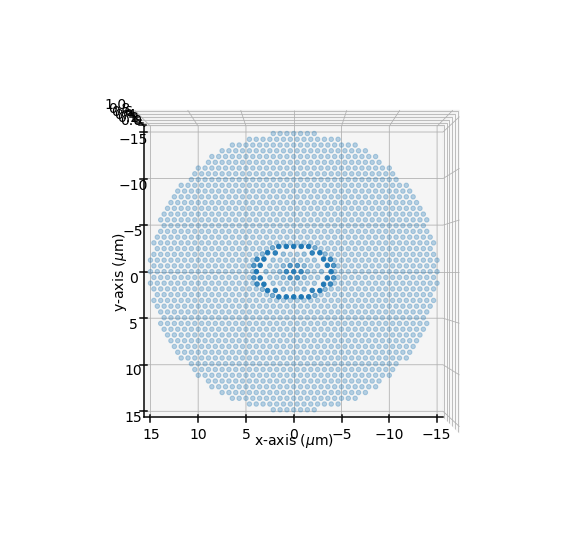

In [53]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(xs*1e6, ys*1e6, Ndet)
ax.view_init(90, 90)
plt.xlabel('x-axis ($\mu$m)');
plt.ylabel('y-axis ($\mu$m)');
#plt.xlim([-10, 10]);
#plt.ylim([-10, 10]);
plt.xlim([-15, 15])
plt.ylim([-15, 15])

plt.show()

---
### Reference: Matlab source code


    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    % Calculation of Mott shell structure in Quantum Gas Microscope (parity measurement)
    %
    % ref. pp.41~54 , D. thesit by C. Weitenberg 
    %
    % Developed by R. Yamamoto
    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    % Reset
    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    clear;

    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    % Parameters
    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    ColormapGreen = dlmread('GreenColorMap.dat');

    % Physical constant
    h_Plank = 6.6260693 * 1e-34; % [J / Hz]
    hbar_Dirac = h_Plank / (2 * pi); % [J / Hz]
    kB_Boltz = 1.3806505 * 1e-23; % [J / K]

    % Lattice parameter
    LambdaL = 0.532; % um

    % Yb
    Isotope = 174;
    switch Isotope
        case 174
            Mass = 174 * 1.66053886 * 1e-27; % [kg]
            a_s = 5.5 * 1e-9; % s-wave scattering length [nm] @ 174Yb
        case 168
            Mass = 168 * 1.66053886 * 1e-27; % [kg]
            a_s = 13.33 * 1e-9; % s-wave scattering length [nm] @ 168Yb
    end

    % Chemical potential <- need to calculate (temporary)
    mu = 2e-30; % [J]

    % Temperature
    T = 10 * 1e-9; % [K] @ Lattice

    % Select setup
    Bloch = 0;
    Current = 1; Case1 = 2; Case2 = 3; Case3 = 4; Case4 = 5; Case5 = 6;
    % Setup = Bloch;
    % Setup = Current;
    Setup = Case5;

    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    % Tilted
    switch Setup
        case Bloch
            P_tilted = 20; % Tilted Lattice beam power / axis [mW]
            f_Kirchhoff = 12; % M12
            Magnification_H = 1;
            f_tilted = 100; % mm
        case Current
            P_tilted = 480; % Tilted Lattice beam power / axis [mW]
            P_tilted = 20; % Tilted Lattice beam power / axis [mW]
            f_Kirchhoff = 12; % M12
            Magnification_H = 1;
            f_tilted = 100; % mm
        case Case1
            P_tilted = 15; % Tilted Lattice beam power / axis [mW]
            f_Kirchhoff = 20.1; % M20
            Magnification_H = abs( -25 / 50);
            f_tilted = 100; % mm
        case Case2
            P_tilted = 15; % Tilted Lattice beam power / axis [mW]
            f_Kirchhoff = 20.1; % M20
            Magnification_H = abs( -25 / 150);
            f_tilted = 50; % mm
        case Case3
            P_tilted = 9; % Tilted Lattice beam power / axis [mW]
            f_Kirchhoff = 20.1; % M20
            Magnification_H = abs( -25 / 100);
            f_tilted = 75; % mm
        case Case4
            P_tilted = 50; % Tilted Lattice beam power / axis [mW]
            f_Kirchhoff = 20.1; % M20
            Magnification_H = abs( -25 / 150);
            f_tilted = 75; % mmcase Case4
        case Case5
            P_tilted = 20; % Tilted Lattice beam power / axis [mW]
            f_Kirchhoff = 20.1; % M20
            Magnification_H = abs( -25 / 100);
            Magnification_H = 1/3;
            f_tilted = 100; % mm
    end

    % P_tilted_max = 600;
    P_tilted_max = 4000 * 0.5 * 0.38; % Current
    % P_tilted_max = 4000 * 0.6 * 0.38; % Photonic cystal fiber ?
    NA_fiber = 0.11; % Numerical Aperture of fiber
    n_mirror = 1.52; % BK7
    w0_tilted_init = f_Kirchhoff * NA_fiber * 0.82; % Initial beam radius
    w0_tilted_H = f_tilted * LambdaL / (pi * w0_tilted_init * Magnification_H); % Tilted Lattice beam radius [um]
    w0_tilted_V = f_tilted * LambdaL / (pi * w0_tilted_init); % Tilted Lattice beam radius [um]
    zR_H = pi * (w0_tilted_H * 1e-6)^2 / (LambdaL * 1e-6);
    zR_V = pi * (w0_tilted_V * 1e-6)^2 / (LambdaL * 1e-6);
    zR = sqrt(zR_H * zR_V); % <- not correct, need to change
    H_tilted = 12.5 / (n_mirror * sqrt(1 - 1 / (2 * n_mirror^2))); % distance of 2 beams
    theta = atan(0.5 * H_tilted / (f_tilted));
    COS = cos(theta); SIN = sin(theta);
    U0_tilted = 4 * 24.7 * kB_Boltz * P_tilted / (w0_tilted_H * w0_tilted_V) * 1e-6;
    U0_tilted_max = 4 * 24.7 * kB_Boltz * P_tilted_max / (w0_tilted_H * w0_tilted_V) * 1e-6;

    % X & Y
    P_H = 21*3; % Horizontal Lattice power [Er]
    w0_H = 25 * 1e-6; % Beam radius [um] @ X & Y Lattice
    w0_HH = 23 * 1e-6; % Beam radius [um] @ X & Y Lattice
    w0_HV = 23 * 1e-6; % Beam radius [um] @ X & Y Lattice
    U0_H = 4 * 24.7 * P_H / (w0_H * 1e6)^2 * kB_Boltz * 1e-6;

    % Trap frequency
    omega_H = sqrt(4 * U0_H / (Mass * w0_H^2)); % [Hz]
    % omega_HZ = sqrt(2 * U0_H / Mass * (2 * pi / (LambdaL * 1e-6))^2); % [Hz]
    omega_HZ = sqrt(4 * U0_H / Mass * (2 * pi / (LambdaL * 1e-6))^2); % [Hz]
    omega_TX = sqrt(2 * U0_tilted / Mass * (COS^2 / zR^2 + 2 * SIN^2 / (w0_tilted_V * 1e-6)^2)); % [Hz]
    omega_TY = sqrt(4 * U0_tilted / (Mass * (w0_tilted_H * 1e-6)^2)); % [Hz]
    omega_TZ = sqrt(2 * U0_tilted / Mass * (SIN^2 * ( 1 / zR^2 + (2 * pi / (LambdaL * 1e-6))^2) + 2 * COS^2 / (w0_tilted_V * 1e-6)^2)); % [Hz]
    omega_X = sqrt(omega_H^2 + omega_TX^2); % [Hz]
    omega_Y = sqrt(omega_H^2 + omega_TY^2); % [Hz]
    omega_Z = omega_TZ; % [Hz]

    % Harmonic oscilator length along z-axis
    lz = sqrt(hbar_Dirac / (Mass * omega_Z)); % [nm] 

    % Lattice parameter
    Er = kB_Boltz * 194 * 1e-9; % Recoil energy [J] @ 532nm Lattice
    a_lat = LambdaL / 2 * 1e-6; % Lattice constant
    a_latV = LambdaL / (2 * sin(theta));

    % Lattice depth
    V_H = (hbar_Dirac * omega_HZ / (2 * Er))^2; % Er
    V_V = U0_tilted + U0_H; % J

    % Onsite interaction U
    U = sqrt(8 / pi) * a_s / lz * sqrt(V_H) * Er;

    % Nearest-neighbor tunneling
    J = 4 / sqrt(pi) * V_H^(3/4) * exp(-2 * sqrt(V_H)) * Er;

    % Number of calculation sites
    Nsite = 20;

    % Calcuration maximum occupancy
    Nmax = 100;
    N = 0;

    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    % Parameter of Bloch Lab.
    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    if Setup == Bloch
        a_lat = 0.532 * 1e-6;
        a_latV = 0.532 * 1e-6;
        Er = 0.25 * kB_Boltz * 194 * 1e-9;
        V_H = 23;
        U = h_Plank * 960;
        J = h_Plank * 3;
        mu = 0.73 * U; T = 0.090 * U / kB_Boltz; % C. Weitenberg D. thesis, p43. Fig.5.1 (d)
        mu = 1.17 * U; T = 0.074 * U / kB_Boltz; % C. Weitenberg D. thesis, p43. Fig.5.1 (e)
        w0_H = 75 * 1e-6;
        w0_tilted_H = 75;
        w0_tilted_V = 75;
        omega_X = 2 * pi * 72;
        omega_Y = 2 * pi * 83;
        omega_Z = 2 * pi * 83;
        Mass = 87 * 1.66053886 * 1e-27; % [kg] 
    end

    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    % Calculate local chemical potential
    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    Xvec = [-Nsite:1:Nsite] * a_lat;
    [XX, YY] = ndgrid(Xvec, Xvec);

    if Setup == Bloch
        %mu_local = max(mu - 0.5 * M174 * (omega_X^2 * XX.^2 + omega_Y^2 * YY.^2), 0);
        mu_local = mu - 0.5 * Mass * (omega_X^2 * XX.^2 + omega_Y^2 * YY.^2);
    else
        mu_local = mu - 0.5 * Mass * (omega_X^2 * (XX / sqrt(2) - YY / sqrt(2)).^2 + omega_Y^2 * (XX / sqrt(2) + YY / sqrt(2)).^2);
    end

    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    % Calculate atom distribution
    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    Beta = 1 / (kB_Boltz * T);

    for n = 0:Nmax
        En = n * (n - 1) * U / 2;
        tmp = (mu_local * n - En) * Beta;
        Pr(:, :, n + 1) = exp(tmp);
        Nreal(:, :, n + 1) = Pr(:, :, n + 1);
        Nreal2(:, :, n + 1) = n * Pr(:, :, n + 1);
        Ndet(:, :, n + 1) = mod(n, 2) * Pr(:, :, n + 1);
    end

    Z = sum(Pr, 3);

    for n = 0:Nmax
        Pr(:, :, n + 1) = Pr(:, :, n + 1) ./ Z;
        Nreal(:, :, n + 1) = Nreal(:, :, n + 1) ./ Z;
        Nreal2(:, :, n + 1) = Nreal2(:, :, n + 1) ./ Z;
        Ndet(:, :, n + 1) = Ndet(:, :, n + 1) ./ Z;
    end

    Ntotal = 0;
    for n = 1:Nmax;
        Ntotal = Ntotal + n * sum(sum(Nreal(:, :, n + 1)));
    end
    Ntmp = Nreal(:, :, N + 1);

    Nreal = sum(Nreal, 3);
    Nreal2 = sum(Nreal2, 3); Nrange = [0, ceil(max(max(Nreal2)))];
    Ndet = sum(Ndet, 3);

    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    % Image plot - observed image
    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    figure(1); clf(1);
    subplot(1, 2, 1);

    colormap(ColormapGreen);
    Min = min(min(Ndet));
    Max = max(max(Ndet));

    Image = (Ndet - Min) / (Max - Min);
    imagesc(Image); axis image; colorbar;
    set(gca, 'FontSize', 16);
    xlabel 'Site';
    ylabel 'Site';

    Parameters = {strcat('Kirchhoff M', num2str(floor(f_Kirchhoff)), ', {\it f}_{tilted} = ', num2str(f_tilted), ' mm'),
        strcat('{\it P}_H = ', num2str(P_H), ' mW, {\it P}_V = ', num2str(P_tilted), ' mW'),
        strcat('{\it w}_0^H \cong ', num2str(w0_H * 1e6), ...
        ' \mum, ({\it w}_0^{TH}, {\it w}_0^{TV}) \cong (', num2str(floor(w0_tilted_H * 10) * 0.1), ', ', num2str(floor(w0_tilted_V * 10) * 0.1),') \mum, '...
        , '{\it w}_o^{TH} / {\it w}_0^{TV} \cong ', num2str(w0_tilted_H / w0_tilted_V, '%.2f')),
        strcat('{\it k}_B{\it T} \cong {\it k}_B\times', num2str(floor(T * 1e11) * 1e-2), ' nK \cong h \times ', num2str(floor(kB_Boltz * T / h_Plank) * 1e-3), ' kHz'),
        strcat('{\it V}_T^{max} \cong {\it k}_B\times', num2str(floor(U0_tilted_max / kB_Boltz * 1e7) * 0.1), ' \muK, {\it P}_V^{max} = ', num2str(P_tilted_max), ' mW/beam'),
        strcat('{\it V}_H \cong ', num2str(floor(V_H)), ' E_R, V_V \cong k_B \times ', num2str(floor(V_V / kB_Boltz * 1e7) * 0.1), ' \muK'),
        strcat('(\omega_x, \omega_y, \omega_z) \cong 2 \pi \times (', num2str(floor(omega_X / (2 * pi))), ', ',  num2str(floor(omega_Y / (2 * pi))), ', ', num2str(floor(omega_Z / (2 * pi))), ') Hz'),
        strcat('{\it a}_L^H = ', num2str(a_lat * 1e9), ' nm, a_L^V \cong ', num2str(floor(a_latV * 10) * 0.1), ' \mum'),
         strcat('U = ', num2str(floor(U / h_Plank) * 1e-3), ' kHz, J/h = ', num2str(floor(J / h_Plank)), ' Hz'),
         strcat('U/J = ', num2str(floor(U / J)), ', \mu/h = ', num2str(floor(mu / h_Plank) * 1e-3), ' kHz'),
         strcat('N_{total} \cong ', num2str(floor(Ntotal)))};
    annotation('textbox', [0.5,0.8,0.1,0.1], 'String', Parameters, 'FontSize', 16);

    %               "$a_l^H =" + string(a_lat * 1e9) + "\ {\rm nm},\ a_l^V \cong " + string(floor(a_latV * 10) * 0.1) + "\ \mu {\rm m}$";
    %               "$U/h = " + string(floor(U / h_Plank) * 1e-3) + "\ {\rm kHz},\ J/h = " + string(floor(J / h_Plank)) + "\ {\rm Hz}$";
    %               "$U/J \cong " + string(floor(U / J)) + ",\ $\mu / h= " + string(floor(mu / h_Plank) * 1e-3) + "\ {\rm kHz}$";
    %               "${N_{\rm total}} \cong" + string(floor(Ntotal)) + "$"...
    %              ];

    %r2 = xstring(0, 0, Parameters, 1, 1);
    %xrects([r2(1) r2(2) + r2(4) r2(3) r2(4)]');
    % xstring(0, 0, Parameters);

    figure(2); clf();
    subplot(1, 2, 1);
    colormap(ColormapGreen);
    imagesc(Nreal2, Nrange); axis image; colorbar;
    set(gca, 'FontSize', 16);
    xlabel 'Site'; ylabel 'Site';